$\textbf{NOM PRENOM : DARGEL FLORIAN}$

$\textbf{TP NETFLIX}$

## The netflix data set

$\textbf{a) What was the Netflix competition?}$



Netflix a réalisé un concours ouvert pour le meilleur algorithme de filtrage collaboratif pour prédire les notes des utilisateurs pour les films, sur la base des notes précédentes sans aucune autre information sur les utilisateurs ou les films, c'est-à-dire sans que les utilisateurs soient identifiés sauf par des numéros attribués pour le concours.

Le grand prix, d'un montant de 1 000 000 $, a été remporté par l'équipe Pragmatic Chaos de BellKor. Il s'agit du jeu de données utilisé dans le cadre de cette compétition.

$\textbf{b) What is the score used to compare the models?}$ 

Le score utilisé pour comparer les modèles est le $\underline{RMSE \; (Root \; mean \; square \; error)}$. Cette metrique est
utilisée pour évaluer la précision prédictive d'un modèle de régression. 


$\textbf{b) download the Netflix training data and the probe set from moodle. Note that
netflix_data_app.mat size is 232.1 Mo.}$

Après avoir télécharger la base de donnée "netflix_data_app.mat" et "netflix_data_probe.mat", on les importe

In [1]:
import  numpy as np
from  time  import  time
from  scipy.sparse  import  csr_matrix
from  scipy.linalg  import  svd
from  scipy.sparse.linalg  import  svds
import  scipy.io
D = scipy.io.loadmat("netflix_data_app.mat")
P = scipy.io.loadmat("netflix_data_probe.mat")

$\textbf{c) What is the size and the type of these data}$

In [2]:
print("On affiche les informations de la data D :  " + str(D))
print("\n Le type de données de la data D :  " + str(D.values))
print("\n data length:{}".format(len(D)))
print("\n On affiche les informations de la data P :   " + str(P))
print("\n Le type de données de la data P:   " + str(P.values))
print("\n data length:{}".format(len(P)))

On affiche les informations de la data D :  {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Jun  5 21:40:42 2008', '__version__': '1.0', '__globals__': [], 'netflix_data_app': <17770x480189 sparse matrix of type '<class 'numpy.float64'>'
	with 99072112 stored elements in Compressed Sparse Column format>}

 Le type de données de la data D :  <built-in method values of dict object at 0x00000288FF2A37E0>

 data length:4

 On affiche les informations de la data P :   {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Jun  5 21:40:30 2008', '__version__': '1.0', '__globals__': [], 'netflix_data_probe': <17770x480189 sparse matrix of type '<class 'numpy.float64'>'
	with 1408395 stored elements in Compressed Sparse Column format>}

 Le type de données de la data P:   <built-in method values of dict object at 0x00000288FF2A3828>

 data length:4


Le types de données D est un __dictionnaire__ en ayant 4 éléments clés qui sont :
   
       header 
       Platform
       Created
       __version__
       __globals__
       netflix_data_app 
       
Le types de données P est un __dictionnaire__ en ayant 4 éléments clés qui sont :
    
       header 
       Platform
       Created
       __version__
       __globals__
       netflix_data_app 
    



La taille du jeux de données 'netflix_data_app' et de "netflix_data_probe" est de  480189 lignes (utilisateurs) x 17770 colonnes (films) 

$\textbf{Build the associated data matrices, and explain the following piece of code.}$

In [3]:
M = D["netflix_data_app"]
Mt = P["netflix_data_probe"]
help(M)

Help on csc_matrix in module scipy.sparse.csc object:

class csc_matrix(scipy.sparse.compressed._cs_matrix)
 |  Compressed Sparse Column matrix
 |  
 |  This can be instantiated in several ways:
 |  
 |      csc_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csc_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsc())
 |  
 |      csc_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csc_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csc_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSC representation where the row indices for
 |          column i are stored in ``indices[indptr[i]:indptr[i+1]]``
 |          and their corresponding values are stored in
 |       

Pour la variable M, on sélectionne l'élement clé qui nous interesse dans le dictionnaire D c'est à dire "netlix_data_app" qui est la matrice sparse.

Pour la variable Mt, on sélectionne l'élement clé qui nous interesse dans le dictionnaire D c'est à dire "netlix_data_probe" qui est la matrice sparse.

In [4]:
M.__class__

scipy.sparse.csc.csc_matrix

## Pre process the data:

__a) Compute RMSE the root mean squared error (RMSE) on the probe set by predicting
missing values by the global mean of the training data, that is:__

$RMSE = \sqrt{\frac{1}{n_t} \sum_{u,m;M_t(u,m) \ne 0} (M_t (u,m) - \mu)^2} $

__How long does it takes to compute this error?__

In [5]:
Mask = (M >.5) #Filtre valeur non nul sur la matrice apprentissage
Maskt = (Mt >.5) #Filtre valeur non nul sur la matrice test 

t0 = time()
moy = M.sum()/(M >.5).sum() #n=(M>.5).sum(), on prend le nombre d'element non nul dans la matrice M 
nt = np.sum(Mt >.5) #On compte le nombre de valeur non nul dans la matrice Mt 
Mt = Mt - moy*Maskt #soustrait par la moyenne 
err0 = np.sqrt(np.sum(Mt.power (2)) / nt) #calcul RMSE
t1 = time()
print("Le temps  de  calcul est de " + str(t1 - t0 ) + " secondes")
print("L'erreur de RMSE est de " + str(err0))

Le temps  de  calcul est de 0.7848715782165527 secondes
L'erreur de RMSE est de 1.129623468965339


Le temps de calcul est très rapide.

__b) La moyenne sur les films__ 

In [6]:
t0 = time()
M = M - Mask*moy
moy_films = M.sum(axis=1) / Mask.sum(axis=1)
Mt = Mt - Maskt.multiply(moy_films)
err1 = np.sqrt(np.sum(Mt.power (2)) / nt )
t1 = time()
print("Le temps  de  calcul est de " + str(t1 - t0 ) + " secondes")
print("L'erreur de RMSE est de " + str(err1))

Le temps  de  calcul est de 1.9674785137176514 secondes
L'erreur de RMSE est de 1.0528157616564056


Cette méthode nous a permi de réduire l'erreur RMSE. Le temps de calcul est légerement plus lent.

__c) la moyenne sur les utilisateurs__

In [7]:
t0 = time()
M = M - Mask.multiply(moy_films)
Moy_utilisateur = M.sum(axis=0) / Mask.sum(axis=0)
Mt = Mt - Maskt.multiply(Moy_utilisateur)
err2 = np.sqrt(np.sum(Mt.power (2)) / nt )
t1 = time()
print("Le temps  de  calcul est de " + str(t1 - t0 ) + " secondes")
print("L'erreur de RMSE est de " + str(err2))

Le temps  de  calcul est de 5.021445989608765 secondes
L'erreur de RMSE est de 0.9889584894704768


Cette méthode nous a permi de réduire encore l'erreur du RMSE. Le temps de calcul est légerement plus lent.

## Recommend using SVD

In [8]:
M = M - (M>0).multiply(Moy_utilisateur)

On choisit notre nouvelle matrice M (soustrait par moyenne globale, films et utilisateurs)

__a) Assuming the optimal number of factor to take into account is smaller than 100, as
a first step of a SVD based recommender system, factorize the residual score matrix
using the SVD. How long does it takes?__

En supposant que le nombre optimal de facteur est inférieur à 100, nous allons prendre un nombre compris entre 1 et 99, prenons par exemple 50

In [9]:
%%time
from scipy.sparse.linalg import svds
U,D,Vt = svds(M, k=50) #on fait la décomposition SVD, on choisit k=50 

Wall time: 1min 15s


Le calcul prend 1 minute et 29 seconde

__b) Explain what does this piece of code do.__

In [10]:
from numpy . random import default_rng #c'est pour fixer l'aléatoire 
nibis = 3
kbis = 8
rngbis = default_rng ()
Ubis = rngbis. standard_normal ((nibis ,kbis))#La matrice Ubis : Tire des échantillons d'une distribution normale standard (moyenne=3, stdev=8).
Vtbis = rngbis. standard_normal ((kbis ,1)) #La matrice Vbis: Tire des échantillons d'une distribution normale standard (moyenne=8, stdev=1).
Pbis = Ubis*Vtbis.T #On ne fait pas le calcul matriciel on fait le produit terme à terme / 3 films noté par 8 utilisateurs
predictionbis = np.cumsum(Pbis ,1) #On fait la sommme ligne par ligne
targetbis = np.array ([[0] ,[0] ,[0]])
errbis =np.sum ((predictionbis - targetbis )**2 ,0)

Prenons un exemple pour expliquer cette partie du code avec $n_i$=2 (lignes) et $k$=3 (colonnes)

On a la matrice U \begin{pmatrix}
a & b & c\\
d & e & f
\end{pmatrix}

On a la matrice V \begin{pmatrix}
g & h & i
\end{pmatrix}

On fait le produit terme à terme c'est à dire U * V.T, ce qui donne \begin{pmatrix}
ag & bh & ci \\
dg & eh & fi 
\end{pmatrix}

On fait ensuite la somme ligne par ligne, ce qui nous donne pour les predictions\begin{pmatrix}
ag & ag + bh & ag + bh + ci \\
dg & dg + eh & dg + eh + fi 
\end{pmatrix}

__c) In one loop, predict the missing test values using the SVD with an increasing number
of component and compute the associated RMSE, that is when the prediction is given
by__

$P(m,u) = \sum_{k=1}^{n_k} U(u,k)V(m,k) + \mu + \mu_m + \mu_u$

On met dans l'ordre décroissant les valeurs singuliere U et Vt (pour un meilleur temps de calcul)

In [10]:
Vt = np.dot(np.diag(D),Vt) #Produit des 2 matrices D et Vt que l'on nomme Vt
U = U[:, ::-1] #Ordre décroissant la matrice U
Vt = Vt[::-1, :] #Ordre décroissant la matrice Vt

In [11]:
Mmin = M.min() #On prend la valeur minimale de la matrice M
Mmax = M.max() #On prend la valeur maximale de la matrice M

In [12]:
%%time
p,n = Mt.shape #p : film, n : utilisateur
square_error = 0. #fixe l'erreur initial à zero
for i in range(0,n):
        
        ind = Maskt[:,i].nonzero()[0] #On prend les valeur non nul
        
        pred = U[ind,:] * Vt[None,:,i] #Element-wise ! Le produit terme à terme
        pred = np.cumsum(pred,1) #On fait la somme ligne par ligne 
        pred = np.maximum(pred,Mmin)
        pred = np.minimum(pred,Mmax)
        
        square_error += np.sum((pred - Mt[ind,i].toarray()[:])**2,0) #calcul de la différence valeur réel et prédit 
        
        if (i+1)%10000 == 0:
            print('{} users done'.format(i+1))
            

error = np.sqrt(square_error/nt) #RMSE

10000 users done
20000 users done
30000 users done
40000 users done
50000 users done
60000 users done
70000 users done
80000 users done
90000 users done
100000 users done
110000 users done
120000 users done
130000 users done
140000 users done
150000 users done
160000 users done
170000 users done
180000 users done
190000 users done
200000 users done
210000 users done
220000 users done
230000 users done
240000 users done
250000 users done
260000 users done
270000 users done
280000 users done
290000 users done
300000 users done
310000 users done
320000 users done
330000 users done
340000 users done
350000 users done
360000 users done
370000 users done
380000 users done
390000 users done
400000 users done
410000 users done
420000 users done
430000 users done
440000 users done
450000 users done
460000 users done
470000 users done
480000 users done
Wall time: 3min 16s


On a plus de 480 000 utilisateurs, notre code les a pris en compte

__d) What is, in this case, the optimal number of factors? Have you got a better result
than Cinematch scores, that is 0.9514 on the probe set?__ 

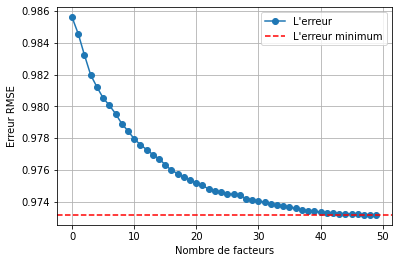

le nombre de facteur optimal est de : 47
La valeur du RMSE est de : 0.9731752047453025


In [31]:
import matplotlib.pyplot as plt
plt.plot(error,'o-', label = "L'erreur")
plt.axhline(y= error[np.argmin(error)], color='red',linestyle='--', label = "L'erreur minimum") #erreur minimale
plt.grid(True)
plt.legend()
plt.xlabel('Nombre de facteurs')
plt.ylabel('Erreur RMSE')
plt.show() 
print("le nombre de facteur optimal est de : " + str(np.argmin(error)))
print("La valeur du RMSE est de : " + str(error[np.argmin(error)]))

On a une erreur plus basse avec la méthode svd. Le nombre optimal de facteur est de 47. Malgrés cela, on a pas eu un meilleur resultat que Cinemath scores qui est de 0.9514, il est recommandé par la suite d'utilisé la méthode SVD avec les poids pénalisé pour améliorer notre résultat

## Recommend using weighted SVD

__a) Write a function to evaluate the performance of this approach on the test matrix.?
How long does it takes to run?__

In [16]:
def  Netflix_probe_error(U, Vt, Maskt, Mt, Mmin, Mmax ,nt):
    p,n =   Mt.shape
    err = 0.
    for j in range(0,n):
        ind = Maskt[:,j]. nonzero ()[0]
        pred = np.dot(U[ind ,:],Vt[:,j])
        pred = np.maximum(pred,Mmin)
        pred = np.minimum(pred,Mmax)
        err+=np.sum((pred - Mt[ind ,j]. toarray ().T)**2)
    return  np.sqrt(err / nt)

In [17]:
%%time
Netflix_probe_error(U,Vt,Maskt ,Mt , Mmin ,Mmax ,nt)

Wall time: 2min 52s


0.9731879816969271

La fonction Netflix_probe_error a pris 2 minutes et 44 secondes pour terminer les calculs.

__b) Improve the previous results by using the weighted SVD approach. Try with 50
factors and alternated least square__

__c) Improve again by using the SGD approach to factorization minimizing on the training
set__

$\underline{On \; rappelle \; le \; probleme \;  de \;  résolution \; de \; la \; SVD \; avec \; les \; poids \; pénalisé}$  

$$
\min_{U,V} \|M - UV^\top\|_W^2 + \lambda \|U\|^2+ \lambda \|V\|^2
$$
avec $\lambda = 5 \; (the \; value \; is \;arbitrary) $ l'Alternating Least Square (ALS) pénalisé se décrit comme suit:

Initialiser $U$ et $V$ avec le SVD sur la matrice complète
$$
\begin{array}{rl}
Boucle &  \\
&  \text{Calcule } U \text{ avec } \min_{U} \|M - UV^\top\|_W^2 + \lambda \|U\|^2 \text{ e fixant } V \\
&  \text{Calcule } V \text{ avec }  \min_{V} \|M - UV^\top\|_W^2 + \lambda \|V\|^2 \text{ with a fixant } U 
\end{array}
$$

Remarque pour réduire le temps de calcul, je l'ai fais avec 2 itérations et j'ai fixé le facteur k= 20

In [18]:
#Méthode ALS

%%time
Mmin = M.min() #taille minimale
Mmax = M.max() #taille maximale
n,p = M.shape # (n: nombre de films, p:nombre d'utilisateurs)
lam=5 #la pénalisation lambda

k = 20 #le nombre de facteur
t0 = time()


I = np.eye(k) #matrice identité de taille 20x20
U, D, Vt = scipy.sparse.linalg.svds(M,k=k)
Vt = np.dot(np.diag(D),Vt) #Produit matricielle D et Vt 
error=Netflix_probe_error(U,Vt,Maskt ,Mt , Mmin ,Mmax ,nt)
    
for nb in range(0,2): #2 iterations 
    to = time()
    for j in range(0,p):
        indj = Mask[:,j].nonzero()[0]
        Vt[:,j] = np.linalg.solve(U[indj,:].T@U[indj,:] + lam*I,U[indj,:].T@M[indj,j]).T


    t1=time()
    print("\n Le temps de calcul est de " + str( t1 - t0 ))
    error=Netflix_probe_error(U,Vt,Maskt ,Mt , Mmin ,Mmax ,nt)
    print("L'erreur est de " + str(error))
    for i in range(0,n):
        indi = Mask[i,:].nonzero()[1]
        U[i,:] = np.linalg.solve(Vt[:,indi]@Vt[:,indi].T + lam*I,Vt[:,indi]@M[i,indi].T).T


error=Netflix_probe_error(U,Vt,Maskt ,Mt , Mmin ,Mmax ,nt)
print("L'erreur de RMSE est de " + str(error))
t1 = time()
print("\n temps de calcul est de " + str( t1 - t0 ) + " secondes \n \n")


 Le temps de calcul est de 662.3497641086578
L'erreur est de 0.9856624142690084

 Le temps de calcul est de 6757.672048091888
L'erreur est de 0.9581060761724204
L'erreur de RMSE est de 0.966144035603755

 temps de calcul est de 11646.12373828888 secondes 
 

Wall time: 3h 14min 6s


On a maintenant un résultat de 0.966. On a un résultat qui est plus proche du score Cinematch qui est de 0.9514. On pourrait améliorer notre résultat si on augmentait notre nombre d'itération. L'inconvenient est que, pour 2 itérations, il nous a fallut plus de 3h pour obtenir cette amélioration. 

## L'ensemble des résultats


    Avec la moyenne globale : erreur = 1.129, temps  de  calcul : 0.784 secondes
    Avec la moyenne du film : erreur = 1.052, temps  de  calcul : 1.96 secondes 
    Avec la moyenne des utilisateurs : erreur = 0.988, temps  de  calcul : 5.021 secondes 
    
    WeightedSVD (Pour k = 50) : erreur = 0.97377, temps de calcul : 3minutes 14 secondes
    PenalizedWeightSVD (ALS) (k=20) : erreur = 0.966, temps de calcul : 3h 14min 6s

Avec différentes méthodes qu'on a parcouru, on peut constater que notre métrique RMSE a diminué. On a constaté qu'on a des méthodes où les resultats sont meilleurs mais le temps de calcul est plus long.

Pour améliorer la valeur du RMSE, on peut aller plus loin en utilisant d'autres méthodes comme le SGD avec pytorch